# Project 4 - Part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Setting default sizes and color for plots
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(15,4)
pd.set_option('display.max_columns', 500)

## Load Data



In [2]:
fpath = "\\Users\\Justice\\Downloads\\Crimes_-_2001_to_Present.csv"
df = pd.read_csv(fpath)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,2.0,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2514,25.0,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7886414 entries, 0 to 7886413
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

# Stakeholder Questions

## Comparing Police Districts:

- Which district has the most crimes? Which has the least?

In [4]:
drop_cols = ["ID", "Case Number", "Date", "Block", "IUCR", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Year", "Updated On", "Latitude", "Longitude", "Location"]
t1_df = df.drop(columns=drop_cols).copy()
t1_df

,Primary Type,District
0,THEFT,6.0
1,DECEPTIVE PRACTICE,8.0
2,NARCOTICS,2.0
3,CRIMINAL DAMAGE,25.0
4,DECEPTIVE PRACTICE,8.0
...,...,...
7886409,CRIMINAL DAMAGE,14.0
7886410,DECEPTIVE PRACTICE,12.0
7886411,CRIMINAL TRESPASS,24.0
7886412,BATTERY,14.0


In [5]:
crimes_by_dist = t1_df.groupby("District")["Primary Type"].value_counts().sort_index()
crimes_by_dist

District  Primary Type                     
1.0       ARSON                                  126
          ASSAULT                              15140
          BATTERY                              33906
          BURGLARY                              5342
          CONCEALED CARRY LICENSE VIOLATION       21
                                               ...  
31.0      PUBLIC PEACE VIOLATION                   1
          ROBBERY                                  2
          SEX OFFENSE                              4
          STALKING                                 1
          THEFT                                   46
Name: Primary Type, Length: 755, dtype: int64

In [6]:
plot_crimes = crimes_by_dist.to_frame('Crime Amount').reset_index()
plot_crimes

,District,Primary Type,Crime Amount
0,1.0,ARSON,126
1,1.0,ASSAULT,15140
2,1.0,BATTERY,33906
3,1.0,BURGLARY,5342
4,1.0,CONCEALED CARRY LICENSE VIOLATION,21
...,...,...,...
750,31.0,PUBLIC PEACE VIOLATION,1
751,31.0,ROBBERY,2
752,31.0,SEX OFFENSE,4
753,31.0,STALKING,1


In [7]:
dist_crime_total = plot_crimes.groupby("District")["Crime Amount"].sum()
dist_crime_total

District
1.0     320252
2.0     373883
3.0     399934
4.0     447697
5.0     349096
6.0     461213
7.0     454662
8.0     529601
9.0     384942
10.0    339813
11.0    505400
12.0    391686
14.0    304832
15.0    337013
16.0    264256
17.0    227560
18.0    354359
19.0    354872
20.0    139730
21.0         4
22.0    258307
24.0    238696
25.0    448312
31.0       247
Name: Crime Amount, dtype: int64

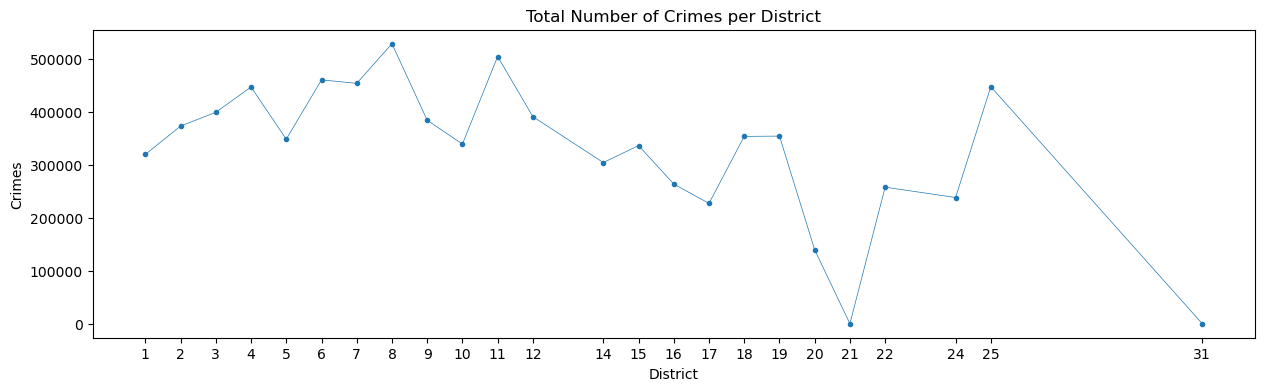

In [8]:
# Plot Total Number of Crimes per District
fig, ax = plt.subplots()
dist_crime_total.plot(title="Total Number of Crimes per District",ylabel='Crimes', marker='.', lw=.5)
ax.set_xticks(dist_crime_total.index)

- Looking at the plot above we can see that district 8 has the most amount of crimes at 52,9601 crimes. 
- The district with the lowest crimes is district 21 at just 4 crimes total.

## Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [9]:
drop_cols2 = ["ID", "Case Number", "Date", "Block", "IUCR", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "District", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Updated On", "Latitude", "Longitude", "Location"]
t2_df = df.drop(columns=drop_cols2).copy()
t2_df

,Primary Type,Year
0,THEFT,2018
1,DECEPTIVE PRACTICE,2016
2,NARCOTICS,2018
3,CRIMINAL DAMAGE,2018
4,DECEPTIVE PRACTICE,2015
...,...,...
7886409,CRIMINAL DAMAGE,2023
7886410,DECEPTIVE PRACTICE,2023
7886411,CRIMINAL TRESPASS,2023
7886412,BATTERY,2023


In [10]:
crimes_per_year = t2_df.groupby("Year")["Primary Type"].value_counts().sort_index()
crimes_per_year

Year  Primary Type                     
2001  ARSON                                 1011
      ASSAULT                              31384
      BATTERY                              93462
      BURGLARY                             26014
      CONCEALED CARRY LICENSE VIOLATION        1
                                           ...  
2023  ROBBERY                               6773
      SEX OFFENSE                            887
      STALKING                               326
      THEFT                                37315
      WEAPONS VIOLATION                     6053
Name: Primary Type, Length: 720, dtype: int64

In [11]:
plot_crimes_year = crimes_per_year.to_frame('Crime Amount').reset_index()
plot_crimes_year

,Year,Primary Type,Crime Amount
0,2001,ARSON,1011
1,2001,ASSAULT,31384
2,2001,BATTERY,93462
3,2001,BURGLARY,26014
4,2001,CONCEALED CARRY LICENSE VIOLATION,1
...,...,...,...
715,2023,ROBBERY,6773
716,2023,SEX OFFENSE,887
717,2023,STALKING,326
718,2023,THEFT,37315


In [12]:
year_crime_total = plot_crimes_year.groupby("Year")["Crime Amount"].sum()
year_crime_total

Year
2001    485888
2002    486807
2003    475985
2004    469422
2005    453773
2006    448179
2007    437088
2008    427183
2009    392827
2010    370515
2011    351993
2012    336320
2013    307537
2014    275790
2015    264788
2016    269827
2017    269103
2018    268905
2019    261339
2020    212211
2021    208847
2022    238902
2023    173185
Name: Crime Amount, dtype: int64

<Axes: title={'center': 'Total Number of Crimes per Year'}, xlabel='Year', ylabel='Crimes'>

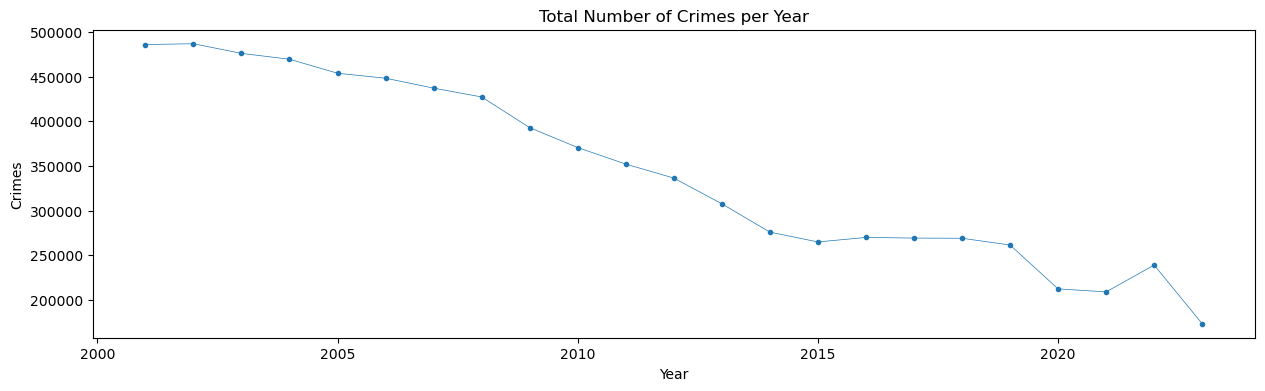

In [13]:
# Plot Total Number of Crimes per Year
fig, ax = plt.subplots()
year_crime_total.plot(title="Total Number of Crimes per Year",ylabel='Crimes', marker='.', lw=.5)

- Looking at the plot above we can see that since the year 2001 the total number of crimes are decreasing across the years.

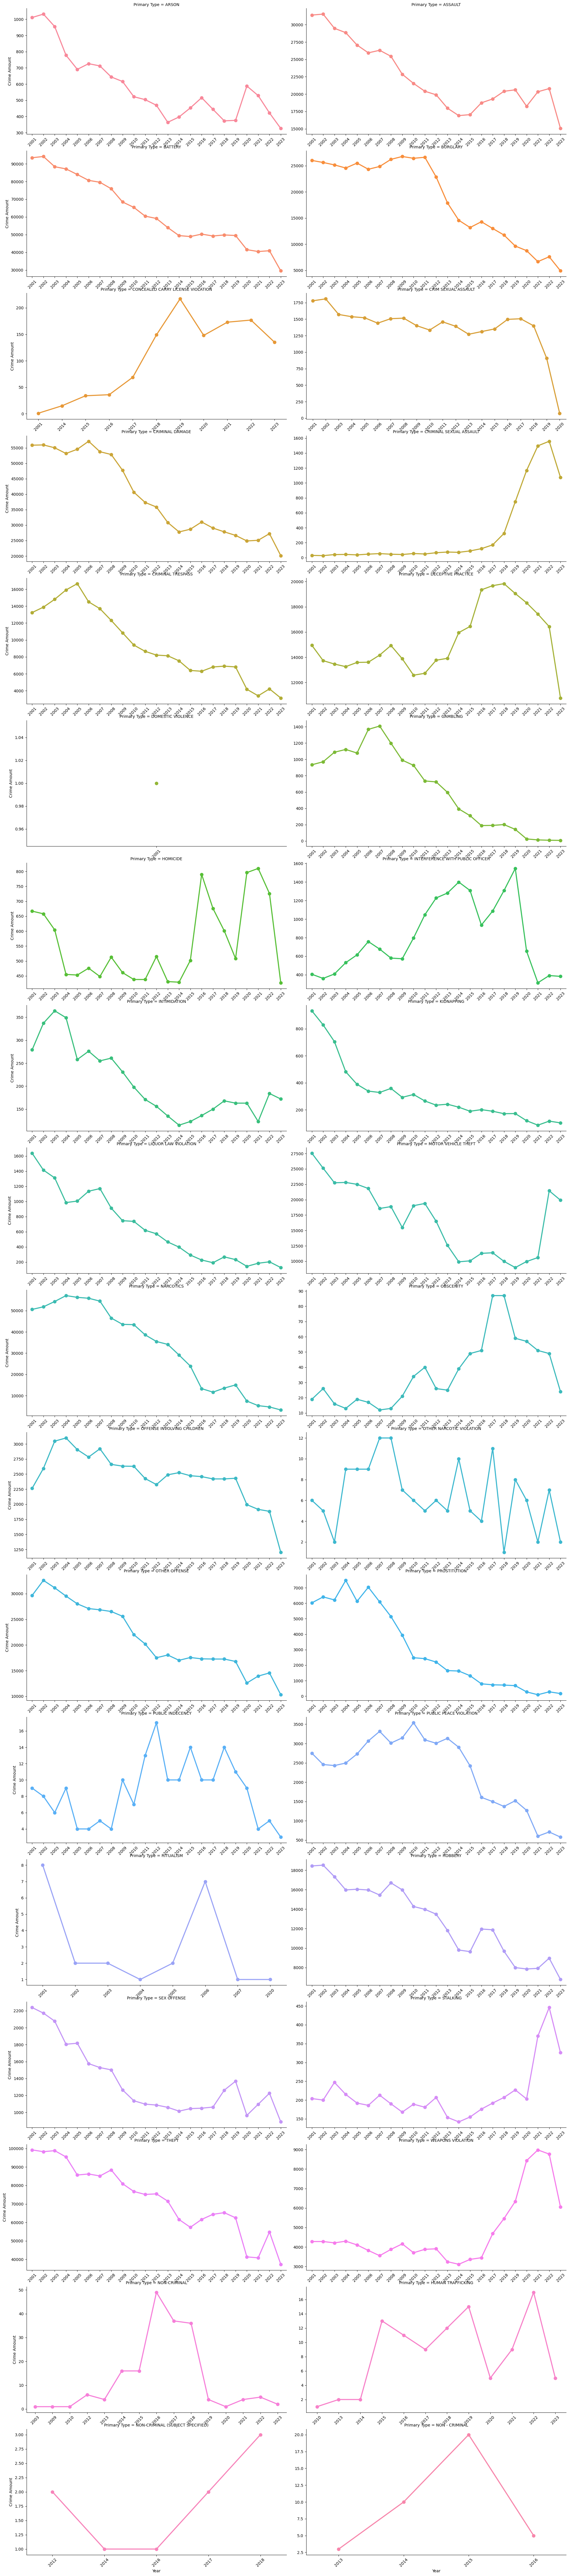

In [14]:
g = sns.catplot(data=plot_crimes_year, x='Year', y='Crime Amount',
                kind='point',aspect=2, height=5,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
g.set_xticklabels(rotation=45)

- Looking at the plots above we can see a handful of crimes that are increasing over the years even though overall crimes in decreasing over the years.
- The crimes included:
    - Concealed carry license violation
    - Criminal sexual assault
    - Stalking
    - Weapons Violation

## Comparing Months:

- What months have the most crime? What months have the least?
- Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [15]:
t4_df = df.copy()
t4_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,2.0,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2514,25.0,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7886409,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,14.0,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7886410,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,1234,12.0,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
7886411,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,2411,24.0,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"
7886412,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,14.0,35.0,21.0,08B,1158868.0,1918755.0,2023,08/19/2023 03:40:26 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"


In [16]:
# Setting time format
fmt = "%m/%d/%Y %I:%M:%S %p"
t4_df["datetime"] = pd.to_datetime(t4_df['Date'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
# Set the datetime column as the index
t4_df = t4_df.set_index("datetime")
t4_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
datetime,,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-07-31 13:30:00,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,2.0,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
2018-12-19 16:30:00,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2514,25.0,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
2015-02-02 10:00:00,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [17]:
# Keep needed columns
drop_cols3 = ["ID", "Case Number", "Date", "Block", "IUCR", "Description", 
             "Location Description", "Arrest", "Domestic",
             "Beat", "District", "Ward", "Community Area", "FBI Code", "X Coordinate",
            "Y Coordinate", "Year", "Updated On", "Latitude", "Longitude", "Location"]
t4_df = t4_df.drop(columns=drop_cols3)
t4_df

,Primary Type
datetime,
2018-09-01 00:01:00,THEFT
2016-05-01 00:25:00,DECEPTIVE PRACTICE
2018-07-31 13:30:00,NARCOTICS
2018-12-19 16:30:00,CRIMINAL DAMAGE
2015-02-02 10:00:00,DECEPTIVE PRACTICE
...,...
2023-06-21 20:00:00,CRIMINAL DAMAGE
2023-05-13 12:00:00,DECEPTIVE PRACTICE
2023-06-24 13:29:00,CRIMINAL TRESPASS


In [18]:
# Add Month Column 1-12
t4_df["Month"] = t4_df.index.month
t4_df["Month"]

datetime
2018-09-01 00:01:00     9
2016-05-01 00:25:00     5
2018-07-31 13:30:00     7
2018-12-19 16:30:00    12
2015-02-02 10:00:00     2
                       ..
2023-06-21 20:00:00     6
2023-05-13 12:00:00     5
2023-06-24 13:29:00     6
2023-06-20 04:00:00     6
2023-06-28 18:00:00     6
Name: Month, Length: 7886414, dtype: int64

In [19]:
t4_df

,Primary Type,Month
datetime,,
2018-09-01 00:01:00,THEFT,9
2016-05-01 00:25:00,DECEPTIVE PRACTICE,5
2018-07-31 13:30:00,NARCOTICS,7
2018-12-19 16:30:00,CRIMINAL DAMAGE,12
2015-02-02 10:00:00,DECEPTIVE PRACTICE,2
...,...,...
2023-06-21 20:00:00,CRIMINAL DAMAGE,6
2023-05-13 12:00:00,DECEPTIVE PRACTICE,5
2023-06-24 13:29:00,CRIMINAL TRESPASS,6


In [20]:
# Filter by crimes by month
crime_per_month = t4_df.groupby('Primary Type')['Month'].value_counts().sort_index()
crime_per_month

Primary Type       Month
ARSON              1          963
                   2          841
                   3         1140
                   4         1134
                   5         1284
                            ...  
WEAPONS VIOLATION  8        10688
                   9         9506
                   10        9190
                   11        7952
                   12        7401
Name: Month, Length: 415, dtype: int64

In [44]:
crime_per_month_df= crime_per_month.to_frame('Crime Amount').reset_index()
crime_per_month_df

,Primary Type,Month,Crime Amount
0,ARSON,1,963
1,ARSON,2,841
2,ARSON,3,1140
3,ARSON,4,1134
4,ARSON,5,1284
...,...,...,...
410,WEAPONS VIOLATION,8,10688
411,WEAPONS VIOLATION,9,9506
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


In [22]:
# month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
#                5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
#                9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

# crime_per_month_df['Month'] = crime_per_month_df['Month'].replace(month_mapping)
# crime_per_month_df

,Primary Type,Month,Crime Amount
0,ARSON,Jan,963
1,ARSON,Feb,841
2,ARSON,Mar,1140
3,ARSON,Apr,1134
4,ARSON,May,1284
...,...,...,...
410,WEAPONS VIOLATION,Aug,10688
411,WEAPONS VIOLATION,Sep,9506
412,WEAPONS VIOLATION,Oct,9190
413,WEAPONS VIOLATION,Nov,7952


In [45]:
plot_crime_month = crime_per_month_df.groupby("Month")["Crime Amount"].sum().sort_index()
plot_crime_month

Month
1     622240
2     547704
3     650278
4     647762
5     704950
6     704099
7     740835
8     733744
9     669759
10    676291
11    608969
12    579783
Name: Crime Amount, dtype: int64

<Axes: title={'center': 'Total Number of Crimes per Month'}, xlabel='Month', ylabel='Crimes'>

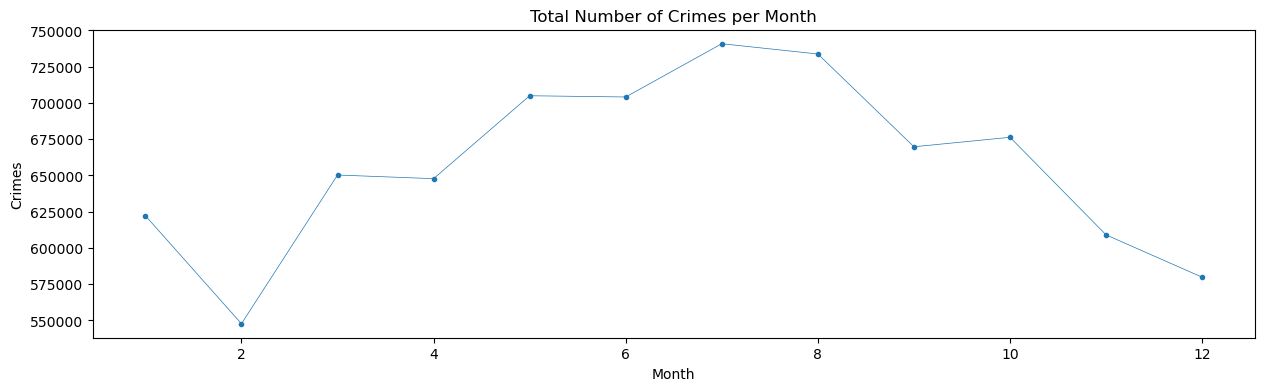

In [46]:
from matplotlib import pyplot as plt
# Plot Total Number of Crimes per month
fig, ax = plt.subplots()
plot_crime_month.plot(title="Total Number of Crimes per Month",ylabel='Crimes', marker='.', lw=.5)


- We can see from the plot above that the month July has the most crimes at 74,0835 crimes over all the years.

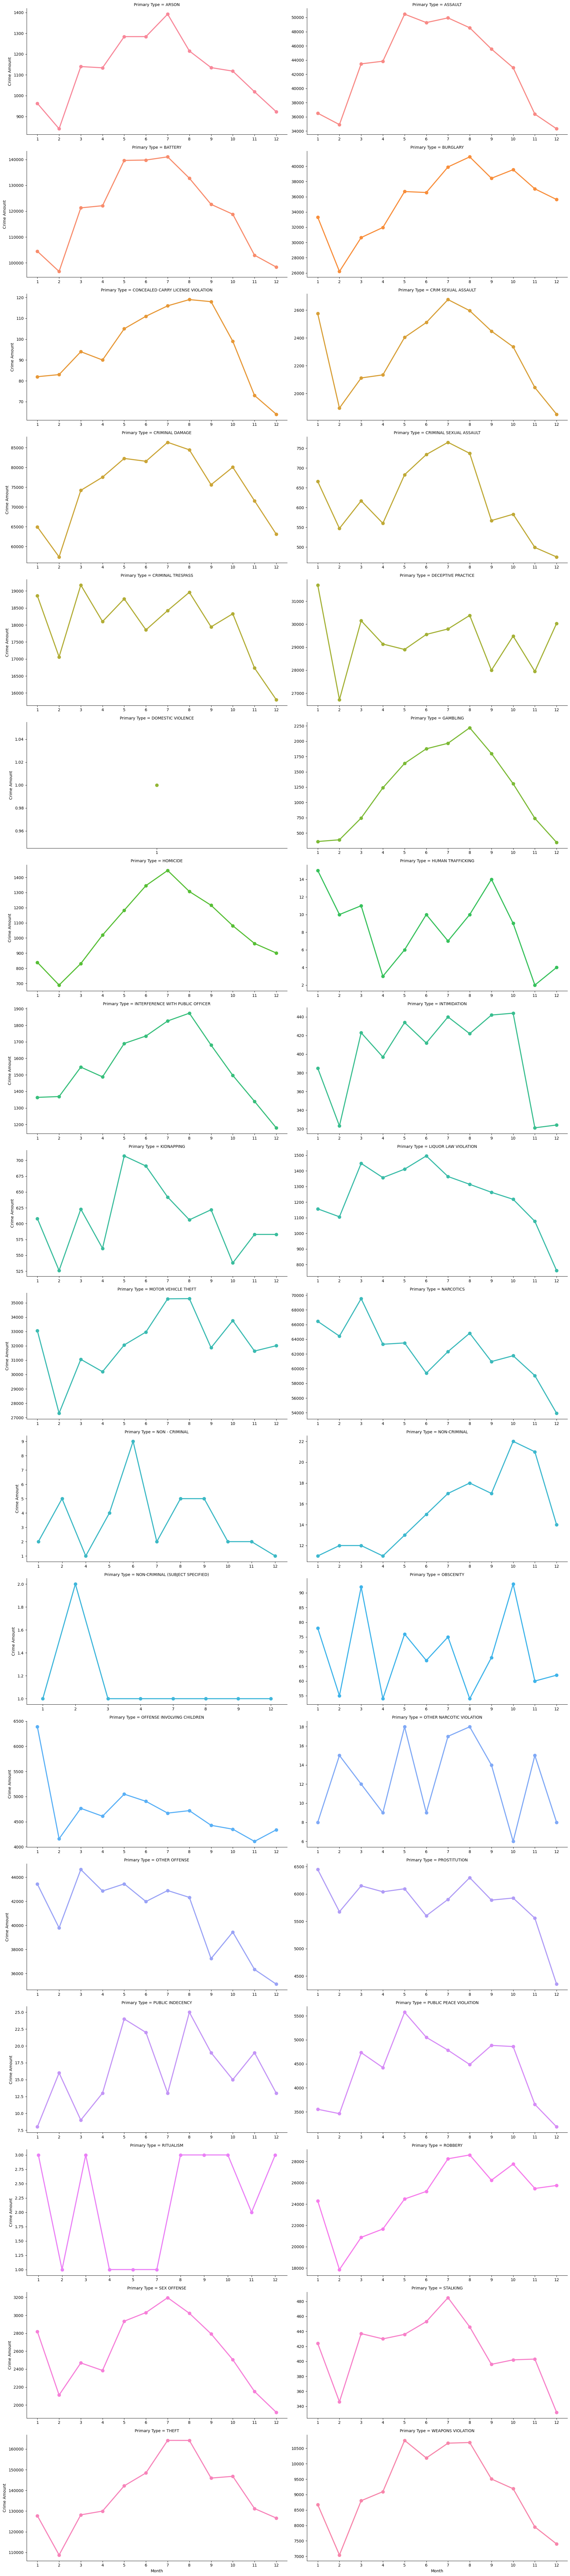

In [47]:
g = sns.catplot(data=crime_per_month_df, x='Month', y='Crime Amount',
                kind='point',aspect=2, height=5,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
g.set_xticklabels(rotation=0)

- Looking at the plots above most crimes fall between May, June and July except for these crimes:
    - Criminal Tresspass
    - Deceptive Practice
    - Human Trafficing
    - Intimidation
    - Liquor Law Violation
    - Narcotics & Other Narcotics Violation
    - Obscenity
    - Prostitution
    - Public Indecency
    - Public Peace Violation
    - Offense involving children